In [20]:
!pip install graphviz

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### 실습 과제 1. 데이터 불러온 후 종속변수 데이터 타입 변경, train_data : test_data = 8:2 split, random_state=1000
#### 종속변수는 'class', 독립변수는 나머지 변수

In [3]:
df = pd.read_csv('./data/Hepatitis.csv')
df.head()

,age,sex,steriod,antivirals,fatigue,mamaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology,class
0,39,1,1,1,1,1,2,2,1,2,2,2,2,2.3,280,98,3.8,40,1,1
1,59,1,1,2,1,1,2,2,1,1,1,2,2,1.5,107,157,3.6,38,2,1
2,47,1,2,2,2,2,2,2,2,2,1,2,1,2.0,84,23,4.2,66,2,1
3,48,1,1,2,1,1,2,2,1,2,1,1,1,4.8,123,157,2.7,31,2,1
4,47,1,2,2,1,1,2,2,1,2,2,1,1,1.7,86,20,2.1,46,2,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              80 non-null     int64  
 1   sex              80 non-null     int64  
 2   steriod          80 non-null     int64  
 3   antivirals       80 non-null     int64  
 4   fatigue          80 non-null     int64  
 5   mamaise          80 non-null     int64  
 6   anorexia         80 non-null     int64  
 7   liver big        80 non-null     int64  
 8   liver firm       80 non-null     int64  
 9   spleen palpable  80 non-null     int64  
 10  spiders          80 non-null     int64  
 11  ascites          80 non-null     int64  
 12  varices          80 non-null     int64  
 13  bilirubin        80 non-null     float64
 14  alk phosphate    80 non-null     int64  
 15  sgot             80 non-null     int64  
 16  albumin          80 non-null     float64
 17  protime          8

,age,sex,steriod,antivirals,fatigue,mamaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology,class
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250,1.837500
std,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539,0.371236
min,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000,1.000000
25%,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000,2.000000
50%,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000,2.000000
75%,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000,2.000000
max,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000,2.000000


In [23]:
df['class'] = df['class'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              80 non-null     int64  
 1   sex              80 non-null     int64  
 2   steriod          80 non-null     int64  
 3   antivirals       80 non-null     int64  
 4   fatigue          80 non-null     int64  
 5   mamaise          80 non-null     int64  
 6   anorexia         80 non-null     int64  
 7   liver big        80 non-null     int64  
 8   liver firm       80 non-null     int64  
 9   spleen palpable  80 non-null     int64  
 10  spiders          80 non-null     int64  
 11  ascites          80 non-null     int64  
 12  varices          80 non-null     int64  
 13  bilirubin        80 non-null     float64
 14  alk phosphate    80 non-null     int64  
 15  sgot             80 non-null     int64  
 16  albumin          80 non-null     float64
 17  protime          8

In [27]:
df['class'].value_counts()

2    67
1    13
Name: class, dtype: int64

In [25]:
X = df.drop(columns='class', axis=1)
Y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1000)
print(f"X_train data shape: {X_train.shape}")
print(f"X_test data shape: {X_test.shape}")

X_train data shape: (64, 19)
X_test data shape: (16, 19)


### 실습2: 5-fold cross validation을 이용해 최적의 하이퍼파라미터를 구하고, test set에 대한 최적 모델의 예측 정확도 구하기
####  하이퍼 파라미터 : max_depth:[2,4,6], min_samples_split: [2,3,4]

In [26]:
hyper_params = {'max_depth':[2,4,6], 'min_samples_split':[2,3,4]}

dtree = tree.DecisionTreeClassifier()
grid_cv = GridSearchCV(dtree, param_grid=hyper_params, cv=5, scoring='accuracy', return_train_score=True)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [32]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,"{'max_depth': 2, 'min_samples_split': 2}",0.953092,0.811538
1,"{'max_depth': 2, 'min_samples_split': 3}",0.953092,0.811538
2,"{'max_depth': 2, 'min_samples_split': 4}",0.953092,0.829487
3,"{'max_depth': 4, 'min_samples_split': 2}",0.996154,0.829487
4,"{'max_depth': 4, 'min_samples_split': 3}",0.992232,0.750000
5,"{'max_depth': 4, 'min_samples_split': 4}",0.988311,0.764103
6,"{'max_depth': 6, 'min_samples_split': 2}",1.000000,0.765385
7,"{'max_depth': 6, 'min_samples_split': 3}",0.996078,0.798718
8,"{'max_depth': 6, 'min_samples_split': 4}",0.988311,0.780769


In [33]:
best_dtree = grid_cv.best_estimator_
best_y_pred = best_dtree.predict(X_test)
best_accuracy = metrics.accuracy_score(y_test, best_y_pred)

print(f"Best estimator: {best_dtree}")
print(f"Best accuracy: {best_accuracy}")

Best estimator: DecisionTreeClassifier(max_depth=2, min_samples_split=4)
Best accuracy: 0.875


In [36]:
report = metrics.classification_report(y_test, best_y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.93      0.93      0.93        14

    accuracy                           0.88        16
   macro avg       0.71      0.71      0.71        16
weighted avg       0.88      0.88      0.88        16



### 실습 3: 최적 트리 모델 이미지 출력하기 (이미지에 변수 이름과 class가 모두 있어야 함), feature importance barplot 출력

var_names: Index(['age', 'sex', 'steriod', 'antivirals', 'fatigue', 'mamaise', 'anorexia',
       'liver big', 'liver firm', 'spleen palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')
class_names: ['1' '2']


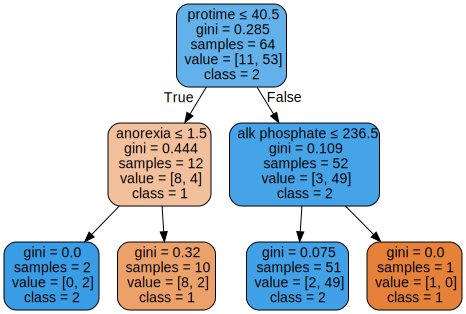

In [40]:
var_names = X_train.columns
class_names = best_dtree.classes_
print(f"var_names: {X_train.columns}")
print(f"class_names: {best_dtree.classes_}")

dot_data = tree.export_graphviz(best_dtree, feature_names=var_names,
                                class_names=class_names, filled=True,
                                rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

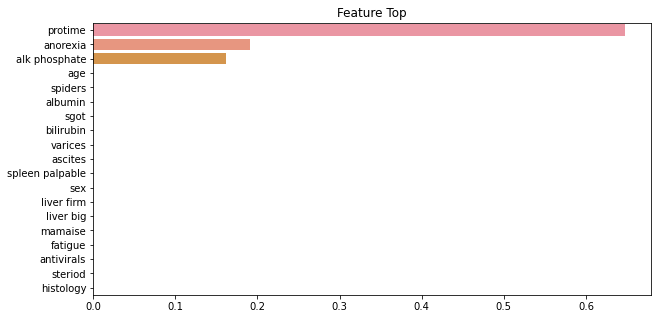

In [42]:
feature_importance_values = best_dtree.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=var_names)
feature_importance_sort = feature_importance_values_s.sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.title('Feature Top')
sns.barplot(x=feature_importance_sort, y=feature_importance_sort.index)
plt.show()

### 실습 4: 최적 트리 모델을 post-pruning하고, post-pruning된 트리 모델 출력(이미지에 변수 이름과 class가 모두 있어야 함)
#### (test accuracy가 높으면서, node개수와 tree depth가 작은 alpha를 찾고, 해당 alpha에 해당하는 트리 모델 출력하는 실습 )

In [43]:
path = best_dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(f"ccp_alphas: {ccp_alphas}")
print(f"impurities: {impurities}")

ccp_alphas: [0.         0.02829233 0.03333333 0.11299329]
impurities: [0.11004902 0.13834135 0.17167468 0.28466797]


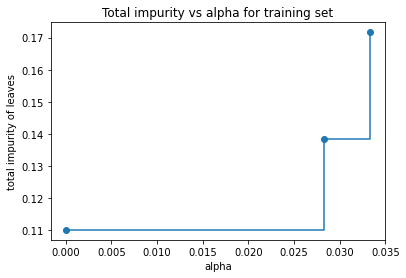

In [46]:
fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title("Total impurity vs alpha for training set")
plt.show()

In [47]:
dtree_list = []
for ccp_alpha in ccp_alphas:
    dtree_alpha = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    dtree_alpha.fit(X_train, y_train)
    dtree_list.append(dtree_alpha)

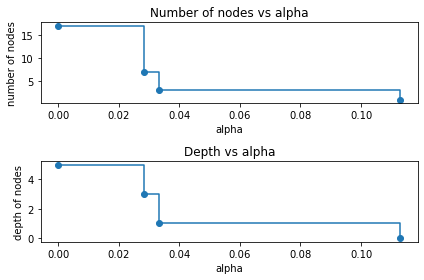

In [52]:
node_counts = [tree_alpha.tree_.node_count for tree_alpha in dtree_list]
depth = [tree_alpha.tree_.max_depth for tree_alpha in dtree_list]

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of nodes')
ax[1].set_title('Depth vs alpha')

fig.tight_layout()
plt.show()

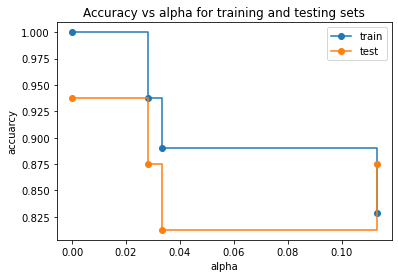

In [53]:
train_scores = [tree_alpha.score(X_train, y_train) for tree_alpha in dtree_list]
test_scores = [tree_alpha.score(X_test, y_test) for tree_alpha in dtree_list]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuarcy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

var_names: Index(['age', 'sex', 'steriod', 'antivirals', 'fatigue', 'mamaise', 'anorexia',
       'liver big', 'liver firm', 'spleen palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')
class_names: ['1' '2']


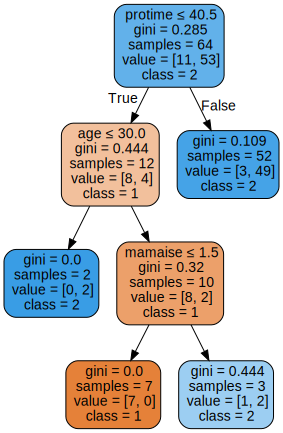

In [56]:
var_names = X_train.columns
class_names = best_dtree.classes_
print(f"var_names: {X_train.columns}")
print(f"class_names: {best_dtree.classes_}")

dot_data = tree.export_graphviz(dtree_list[1], feature_names=var_names,
                                class_names=class_names, filled=True,
                                rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph